In [ ]:
#データの読み込み
import torch
import pandas as pd
header = ["question", "answer"]
dataset = pd.read_csv("/content/drive/My Drive/Chatbot/dataset/dialogs.txt", sep='\t',header=None, names=header)
device = torch.device("cuda")
# https://www.kaggle.com/grafstor/simple-dialogs-for-chatbot

In [ ]:
dataset

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [ ]:
import torch
from torch.utils.data import DataLoader


class EncoderDecoder(object):
    def __init__(self, sentences, bos=False, eos=False):
        # word_to_idの辞書
        self.w2i = {}
        # id_to_wordの辞書
        self.i2w = {}
        # 文頭の記号を入れるか
        self.bos = bos
        # 文末の記号を入れるか
        self.eos = eos
        # 予約語(パディング, 文章の始まり)
        self.special_chars = ['<pad>', '<s>', '</s>', '<unk>']
        self.bos_char = self.special_chars[1]
        self.eos_char = self.special_chars[2]
        self.oov_char = self.special_chars[3]
        # 全ての単語を読み込んで辞書作成
        self.fit(sentences)

    # コールされる関数
    def __call__(self, sentence):
        return self.transform(sentence)

    # 辞書作成
    def fit(self, sentences):
        self._words = set()

        # 未知の単語の集合を作成する
        for sentence in sentences:
            self._words.update(sentence)

        # 予約語分ずらしてidを振る
        self.w2i = {w: (i + len(self.special_chars))
                    for i, w in enumerate(self._words)}

        # 予約語を辞書に追加する(<pad>:0, <s>:1, </s>:2, <unk>:3)
        for i, w in enumerate(self.special_chars):
            self.w2i[w] = i

        # word_to_idの辞書を用いてid_to_wordの辞書を作成する
        self.i2w = {i: w for w, i in self.w2i.items()}

    # 1文をidに変換する
    def transform(self, sentence):
        # 指定があれば始まりと終わりの記号を追加する
        if self.bos:
            sentence = [self.bos_char] + sentence
        if self.eos:
            sentence = sentence + [self.eos_char]
        output = self.encode(sentence)

        return output

    # 1文ずつidにする
    def encode(self, sentence):
        output = []
        for w in sentence:
            if w not in self.w2i:
                idx = self.w2i[self.oov_char]
            else:
                idx = self.w2i[w]
            output.append(idx)

        return output

In [ ]:
def padding(sentence, max_length, pad):
  length = len(sentence)
  sent = sentence.copy()
  sent.append("</s>")
  for i in range(max_length - length):
    sent.append(pad)
  return sent

In [ ]:
def calc_max(matrix):
  leng = []
  for i in range(len(matrix)):
    leng.append(len(matrix[i]))
  max_length = np.max(leng)
  return max_length

In [ ]:
a = dataset.answer[0]

In [ ]:
import re
def arrange_data(text):
  text = str(text)
  punctuation = '"#$%&\()*+-/:;<=>[\\]^_`{|}~'
  text = text.lower()
  all_text = ''.join([c for c in text if c not in punctuation])
  all_text = all_text.replace(".", " . ")
  all_text = all_text.replace("!", " ! ")
  all_text = all_text.replace("?", " ? ")
  s_text = all_text.split()
  return s_text

In [ ]:
pre_questions1 = dataset.question 
pre_answers1 = dataset.answer

pre_questions2 = []
pre_answers2 = []
all_vocabs = []

data_num = len(dataset)
for i in range(data_num):
  pre_questions2.append(arrange_data(pre_questions1[i]))
  pre_answers2.append(arrange_data(pre_answers1[i]))
  all_vocabs.append(arrange_data(pre_answers1[i]))
  all_vocabs.append(arrange_data(pre_questions1[i]))


In [ ]:
pre_questions2[0:5]

[['hi,', 'how', 'are', 'you', 'doing', '?'],
 ["i'm", 'fine', '.', 'how', 'about', 'yourself', '?'],
 ["i'm", 'pretty', 'good', '.', 'thanks', 'for', 'asking', '.'],
 ['no', 'problem', '.', 'so', 'how', 'have', 'you', 'been', '?'],
 ["i've", 'been', 'great', '.', 'what', 'about', 'you', '?']]

In [ ]:
transform_vocab = EncoderDecoder(all_vocabs, bos=True, eos=False)
vocab_size = len(transform_vocab.w2i)

In [ ]:
print(transform_vocab.i2w[5])
print(transform_vocab.w2i["."])

old,
1656


In [ ]:
all_vocabs[2000:2005]

[['oh,',
  'no',
  'you',
  "don't",
  '.',
  'puppies',
  "don't",
  'eat',
  'vegetables',
  '.'],
 ['no',
  'problem',
  '.',
  "i'll",
  'give',
  'him',
  'food',
  'off',
  'my',
  'plate',
  '.'],
 ['how', 'many', 'are', 'there', '?'],
 ['look', 'at', 'all', 'these', 'kittens', '!'],
 ['eight', '.']]

In [ ]:
pre_questions2[0:5]


[['hi,', 'how', 'are', 'you', 'doing', '?'],
 ["i'm", 'fine', '.', 'how', 'about', 'yourself', '?'],
 ["i'm", 'pretty', 'good', '.', 'thanks', 'for', 'asking', '.'],
 ['no', 'problem', '.', 'so', 'how', 'have', 'you', 'been', '?'],
 ["i've", 'been', 'great', '.', 'what', 'about', 'you', '?']]

In [ ]:
import numpy as np
question_max = calc_max(pre_questions2)
answer_max = calc_max(pre_answers2)
print("question_max: ", question_max)
print("answer_max: ", answer_max)

def data_input_tokens(data_num, sentences, max_length, pad, transform):
  long_tensor = sentences[data_num]
  pad_tensor = padding(long_tensor, max_length, pad)
  if transform != None:
    pad_tensor = transform(pad_tensor)
  input_tensor = torch.LongTensor(pad_tensor).to(device)
  return input_tensor

def set_input_data(data_num):
  question = data_input_tokens(data_num, pre_questions2, question_max, '<pad>', transform_vocab)
  answer = data_input_tokens(data_num, pre_answers2, answer_max, '<pad>', transform_vocab)

  return question, answer
input_size = question_max+2

question_max:  21
answer_max:  21


In [ ]:
a, b = set_input_data(0)

In [ ]:
pad_index = 0
sos_index = 1
eos_index = 2
period = transform_vocab.w2i["."]
device2 = torch.device("cpu")
def decode_ids(ids):
  ids = ids.to(device2).detach().clone().numpy()
  new_ids = []
  answer = []
  for i in range(len(ids)):
    id = ids[i]
    if (id != sos_index) and (id != eos_index) and (id != pad_index):
      new_ids.append(id)
    
  for i in range(len(new_ids)):
    answer.append(transform_vocab.i2w[new_ids[i]])
 
  new_answer = ' '.join([str(n) for n in answer])
  return new_answer

def decode_ids_NotCuda(ids):
  new_ids = []
  answer = []
  for i in range(len(ids)):
    id = ids[i]
    if (id != sos_index) and (id != eos_index) and (id != pad_index):
      new_ids.append(id)
    
  for i in range(len(new_ids)):
    answer.append(transform_vocab.i2w[new_ids[i]])
 
  new_answer = ' '.join([str(n) for n in answer])
  return new_answer

In [ ]:
decode_ids(b)

"i'm fine . how about yourself ?"

In [ ]:
#Encoder
import torch
import torch.nn as nn
import torch.nn.functional as F
hidden_size = 256
embedding_size = 50
drop_out = 0
n_layer_en = 1

class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.bigru = nn.GRU(embedding_size, hidden_size, n_layer_en, bidirectional=True, batch_first=True, dropout=drop_out)
    
    self.linear_e = nn.Linear(2*hidden_size, 2*hidden_size, bias=False)
    
  def forward(self, question):
    question_embedded = self.embedding_layer(question.unsqueeze(0))

    encoder_out, hidden = self.bigru(question_embedded)
    question_fwd = hidden[0:hidden.size(0):2]
    question_bwd = hidden[1:hidden.size(0):2]
    question_encoded = torch.cat([question_fwd, question_bwd], dim=2)

    question_encoded = self.linear_e(question_encoded)
    question_hidden = torch.stack([question_encoded[0, 0, :hidden_size], question_encoded[0, 0, hidden_size:]]).unsqueeze(1)

    return encoder_out, question_hidden, question_encoded

encoder = Encoder()
encoder = encoder.to(device)

In [ ]:
question, answer = set_input_data(0)
encoder_out, question_hidden, question_encoded = encoder(question)
print(encoder_out.size(), question_hidden.size(), question_encoded.size())

torch.Size([1, 23, 512]) torch.Size([2, 1, 256]) torch.Size([1, 1, 512])


In [ ]:
v = torch.rand(1, 1, 10)
mask = torch.tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0]).unsqueeze(0).unsqueeze(0)
v.data.masked_fill_(
                mask == 0, -float('Inf')
            )
v = F.softmax(v, dim=-1)
v

tensor([[[0.3618, 0.2846, 0.3536, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000]]])

In [ ]:
question

tensor([   1, 1791, 2763,  891, 1687,  288, 1380,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       device='cuda:0')

In [ ]:
question.unsqueeze(0).unsqueeze(0).size()
v = torch.rand(1, 1, input_size).to(device)
v.data.masked_fill_(
                question == 0, -float('Inf')
            )
v = F.softmax(v, dim=-1)
v

tensor([[[0.0763, 0.0824, 0.1266, 0.1705, 0.0770, 0.1551, 0.1857, 0.1264,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],
       device='cuda:0')

In [ ]:
s = encoder_out
a = torch.rand(1, 1, input_size).to(device)
print(s.size(), a.size())
c = torch.bmm(a, s)
print(c.size())

torch.Size([1, 23, 512]) torch.Size([1, 1, 23])
torch.Size([1, 1, 512])


In [ ]:
n_layer_de = 2
class Attention(nn.Module):
  def __init__(self):
    super(Attention, self).__init__()

    self.linearV = nn.Linear(hidden_size, 1, bias=False)
    self.linearS = nn.Linear(2*hidden_size, hidden_size)
    self.linearH = nn.Linear(n_layer_de*hidden_size, hidden_size)
    self.cover_layer = nn.Linear(input_size, hidden_size, bias=False)
    
  def forward(self, s, h, mask, cover):
    S = self.linearS(s)
    H = self.linearH(h)
    C = self.cover_layer(cover)
    v = torch.tanh(self.linearV(S + H + C)).squeeze(-1).unsqueeze(0)
    
    if mask is not None:
      mask = mask.unsqueeze(0).unsqueeze(0)
      v.data.masked_fill_(
                mask == 0, -6.0
            )
    a = F.softmax(v, dim=-1)
    context = torch.bmm(a, s)
    next_cover = cover + a

    return a, next_cover, context

attention = Attention()
attention = attention.to(device)

In [ ]:
cover = torch.zeros(1, 1, input_size).to(device)
s = encoder_out
h = torch.rand(1, 1, 2*hidden_size).to(device)
mask = question
a, next_cover, context = attention(s, h, mask, cover)
print(a.size(), next_cover.size(), context.size())
print(a)

torch.Size([1, 1, 23]) torch.Size([1, 1, 23]) torch.Size([1, 1, 512])
tensor([[[0.1303, 0.1227, 0.1240, 0.1287, 0.1261, 0.1217, 0.1211, 0.1188,
          0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
          0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004]]],
       device='cuda:0', grad_fn=<SoftmaxBackward>)


In [ ]:
n_layer_de = 2
eps = 1e-40
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.gru = nn.GRU(embedding_size, hidden_size, n_layer_de, bidirectional=False, batch_first=True, dropout=drop_out)
    self.attention = Attention()
    self.linear_d = nn.Linear(3*hidden_size, hidden_size)
    self.vocab_linear = nn.Linear(hidden_size, vocab_size)
    
  def forward(self, encoder_out, question_encoded, decoder_out, decoder_hidden, question, cover, step):

    input_emb = self.embedding_layer(decoder_out)

    gru_out, gru_hidden = self.gru(input_emb, decoder_hidden)

    h = torch.cat([gru_hidden[0], gru_hidden[1]], dim=-1).unsqueeze(0)

    a, next_cover, context = attention(encoder_out, h, question, cover)
    context_out = torch.cat([gru_out, context], dim=-1)

    decoder_out = F.relu(self.linear_d(context_out))
    decoder_out = F.log_softmax(self.vocab_linear(decoder_out)+eps, dim=-1)    
    return gru_hidden, decoder_out, a, next_cover

decoder = Decoder()
decoder = decoder.to(device)

In [ ]:
decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
print(decoder_out.size())
decoder_hidden = question_hidden
decoder_hidden, decoder_out, a, next_cover = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, cover, 0)
print(decoder_hidden.size(), decoder_out.size())
decoder_out = decoder_out.argmax(-1)
decoder_hidden, decoder_out, a, next_cover = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, cover, 0)

torch.Size([1, 1])
torch.Size([2, 1, 256]) torch.Size([1, 1, 2804])


In [ ]:
criterion = nn.NLLLoss(reduction="sum", ignore_index=pad_index)
import torch.optim as optim
lr = 0.00001
encoder_optimizer = optim.Adam(encoder.parameters(), lr=lr, weight_decay=1e-6)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-6)

In [ ]:
def train(data_num, teacher_forcing_p, alpha):
  encoder.train()
  decoder.train()
  encoder_optimizer.zero_grad()
  decoder_optimizer.zero_grad()

  question, answer = set_input_data(data_num)

  rand = np.random.rand()
  if teacher_forcing_p > rand:
      teacher_forcing = True
  else:
      teacher_forcing = False

  length = answer_max + 2

  #encoder
  encoder_out, question_hidden, question_encoded = encoder(question)

  decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
  decoder_hidden = question_hidden
  next_cover = torch.zeros(1, 1, input_size).to(device).requires_grad_()
  cover_index = []
  a_index = []
  log_logit_index = []
  for step in range(length):
    #decoder
    cover = next_cover
    decoder_hidden, decoder_out, a, next_cover = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, next_cover, step)
    log_logit_index.append(decoder_out.squeeze(0))
    if teacher_forcing:
      decoder_out = answer[step].unsqueeze(0).unsqueeze(0)
    else:
      decoder_out = decoder_out.argmax(-1)
    
    cover_index.append(cover)
    a_index.append(a)

  cover_index = torch.cat(cover_index, dim=0)
  a_index = torch.cat(a_index, dim=0)
  cov_loss = torch.sum(torch.min(cover_index, a_index))
  log_logit_index = torch.cat(log_logit_index, dim=0)
  loss = criterion(log_logit_index, answer) + alpha*cov_loss

  loss.backward()
  encoder_optimizer.step()
  decoder_optimizer.step()

  return loss.item()

def test(data_num, teacher_forcing_p, alpha):
  encoder.eval()
  decoder.eval()

  question, answer = set_input_data(data_num)

  rand = np.random.rand()
  if teacher_forcing_p > rand:
      teacher_forcing = True
  else:
      teacher_forcing = False

  length = answer_max + 2

  #encoder
  encoder_out, question_hidden, question_encoded = encoder(question)

  decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
  decoder_hidden = question_hidden
  next_cover = torch.zeros(1, 1, input_size).to(device).requires_grad_()
  cover_index = []
  a_index = []

  log_logit_index = []
  word_index = []
  for step in range(length):
    #decoder
    cover = next_cover
    decoder_hidden, decoder_out, a, next_cover = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, next_cover, step)
    log_logit_index.append(decoder_out.squeeze(0))
    if teacher_forcing:
      decoder_out = answer[step].unsqueeze(0).unsqueeze(0)
    else:
      decoder_out = decoder_out.argmax(-1)
    word_index.append(decoder_out)

    cover_index.append(cover)
    a_index.append(a)

  word_index = torch.cat(word_index, dim=-1).squeeze(0)

  cover_index = torch.cat(cover_index, dim=0)
  a_index = torch.cat(a_index, dim=0)
  cov_loss = torch.sum(torch.min(cover_index, a_index))
  log_logit_index = torch.cat(log_logit_index, dim=0)
  loss = criterion(log_logit_index, answer) + alpha*cov_loss

  return loss.item(), word_index

epoch:  0
loss:  59.099594741821235
loss_test:  63.366141749382024
question:  swiss.
gold answer:  of course, the cheese with holes in it.
generated text:  i i . . .
 
epoch:  1
loss:  48.820034361839376
loss_test:  54.745606714248744
question:  perfect. we don't have to listen to barking dogs.
gold answer:  and there are only six units in the whole building.
generated text:  i i . .
 
epoch:  2
loss:  48.50300904655456
loss_test:  55.57704170131671
question:  three different people will give you three different stories.
gold answer:  and the government will give you a fourth story.
generated text:  i i . . . .
 
epoch:  3
loss:  46.52789126968381
loss_test:  57.613775354862085
question:  i didn't know you had a gun.
gold answer:  everyone in america should have a gun.
generated text:  i you you . . . . . . . .
 
epoch:  4
loss:  46.24658033275618
loss_test:  57.355184742450724
question:  and now i'm glad that i didn't.
gold answer:  why's that?
generated text:  i you you . . . . . . .

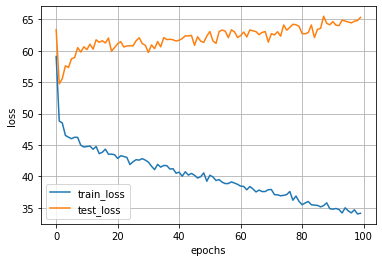

In [ ]:
dataset_num = len(dataset)
train_loss_history = []
test_loss_history = []
batch_size = 2000
for i in range(100):
  loss = 0
  loss_test = 0
  for j in range(batch_size):
    a = np.random.choice(list(range(0, 2500)))
    b = np.random.choice(list(range(2500, dataset_num)))

    loss_i = train(a, 0.9, 0.2)
    loss_test_i, word_index = test(b, 0, 0.2)
    loss += loss_i / batch_size
    loss_test += loss_test_i / batch_size
  print("epoch: ",i)
  print("loss: ",loss)
  print("loss_test: ",loss_test)
  print("question: ", pre_questions1[b])
  print("gold answer: ", pre_answers1[b])
  text = decode_ids(word_index)
  print("generated text: ", text)
  print(' ')
  
  train_loss_history.append(loss)

  test_loss_history.append(loss_test)


import matplotlib.pyplot as plt


plt.plot(train_loss_history, marker=' ', label='train_loss')
plt.plot(test_loss_history, marker=' ', label='test_loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def call_test(data_num):
  loss_test_i, word_index = test(data_num, 0, 0.2)
  text = decode_ids(word_index)
  print("loss_test: ",loss_test)
  print("question: ", pre_questions1[data_num])
  print("gold answer: ", pre_answers1[data_num])
  print("generated answer: ", text)

In [ ]:
for i in range(15):
  ss = i
  call_test(ss)
  print("________")

loss_test:  65.33435596084597
question:  hi, how are you doing?
gold answer:  i'm fine. how about yourself?
generated answer:  i don't know . . . . .
________
loss_test:  65.33435596084597
question:  i'm fine. how about yourself?
gold answer:  i'm pretty good. thanks for asking.
generated answer:  i don't know . .
________
loss_test:  65.33435596084597
question:  i'm pretty good. thanks for asking.
gold answer:  no problem. so how have you been?
generated answer:  i think you . . .
________
loss_test:  65.33435596084597
question:  no problem. so how have you been?
gold answer:  i've been great. what about you?
generated answer:  i don't know . . .
________
loss_test:  65.33435596084597
question:  i've been great. what about you?
gold answer:  i've been good. i'm in school right now.
generated answer:  i don't know . . .
________
loss_test:  65.33435596084597
question:  i've been good. i'm in school right now.
gold answer:  what school do you go to?
generated answer:  i think that . .
_

In [ ]:
torch.save(encoder.state_dict(), "/content/drive/My Drive/Chatbot/encoder_CoverageAttentionSeq2SeqDialogs.pth")
torch.save(decoder.state_dict(), "/content/drive/My Drive/Chatbot/decoder_CoverageAttentionSeq2SeqDialogs.pth")

In [ ]:
#Encoder
import torch
import torch.nn as nn
import torch.nn.functional as F
hidden_size = 256
embedding_size = 50
drop_out = 0
n_layer_en = 1

class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.bigru = nn.GRU(embedding_size, hidden_size, n_layer_en, bidirectional=True, batch_first=True, dropout=drop_out)
    
    self.linear_e = nn.Linear(2*hidden_size, 2*hidden_size, bias=False)
    
  def forward(self, question):
    question_embedded = self.embedding_layer(question.unsqueeze(0))

    encoder_out, hidden = self.bigru(question_embedded)
    question_fwd = hidden[0:hidden.size(0):2]
    question_bwd = hidden[1:hidden.size(0):2]
    question_encoded = torch.cat([question_fwd, question_bwd], dim=2)

    question_encoded = self.linear_e(question_encoded)
    question_hidden = torch.stack([question_encoded[0, 0, :hidden_size], question_encoded[0, 0, hidden_size:]]).unsqueeze(1)

    return encoder_out, question_hidden, question_encoded

encoder = Encoder()
encoder = encoder.to(device)

n_layer_de = 2
class Attention(nn.Module):
  def __init__(self):
    super(Attention, self).__init__()

    self.linearV = nn.Linear(hidden_size, 1, bias=False)
    self.linearS = nn.Linear(2*hidden_size, hidden_size)
    self.linearH = nn.Linear(n_layer_de*hidden_size, hidden_size)
    self.cover_layer = nn.Linear(input_size, hidden_size, bias=False)
    
  def forward(self, s, h, mask, cover):
    S = self.linearS(s)
    H = self.linearH(h)
    C = self.cover_layer(cover)
    v = torch.tanh(self.linearV(S + H + C)).squeeze(-1).unsqueeze(0)
    
    if mask is not None:
      mask = mask.unsqueeze(0).unsqueeze(0)
      v.data.masked_fill_(
                mask == 0, -6.0
            )
    a = F.softmax(v, dim=-1)
    context = torch.bmm(a, s)
    next_cover = cover + a

    return a, next_cover, context


n_layer_de = 2
eps = 1e-40
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.gru = nn.GRU(embedding_size, hidden_size, n_layer_de, bidirectional=False, batch_first=True, dropout=drop_out)
    self.attention = Attention()
    self.linear_d = nn.Linear(3*hidden_size, hidden_size)
    self.vocab_linear = nn.Linear(hidden_size, vocab_size)
    
  def forward(self, encoder_out, question_encoded, decoder_out, decoder_hidden, question, cover, step):

    input_emb = self.embedding_layer(decoder_out)

    gru_out, gru_hidden = self.gru(input_emb, decoder_hidden)

    h = torch.cat([gru_hidden[0], gru_hidden[1]], dim=-1).unsqueeze(0)

    a, next_cover, context = attention(encoder_out, h, question, cover)
    context_out = torch.cat([gru_out, context], dim=-1)

    decoder_out = F.relu(self.linear_d(context_out))
    decoder_out = F.log_softmax(self.vocab_linear(decoder_out)+eps, dim=-1)    
    return gru_hidden, decoder_out, a, next_cover

decoder = Decoder()
decoder = decoder.to(device)

In [ ]:
dir(torch.load(encoder_path))

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_metadata',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'move_to_end',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
encoder = Encoder()
decoder = Decoder()
encoder_path = "/content/drive/My Drive/Chatbot/eval2/encoder_CoverageAttentionSeq2SeqDialogs.pth"
decoder_path = "/content/drive/My Drive/Chatbot/eval2/decoder_CoverageAttentionSeq2SeqDialogs.pth"
encoder.load_state_dict(torch.load(encoder_path))
decoder.load_state_dict(torch.load(decoder_path))

<All keys matched successfully>

In [ ]:
encoder = encoder.to(device)
decoder = decoder.to(device)
call_test(2777)

loss_test:  65.33435596084597
question:  but someone's going to break it, so what good is it?
gold answer:  well, he can enjoy it while it lasts.
generated answer:  i don't know . . . . . . .


In [ ]:
def test_eval(data_num, teacher_forcing_p, alpha):
  encoder.eval()
  decoder.eval()

  question, answer = set_input_data(data_num)

  rand = np.random.rand()
  if teacher_forcing_p > rand:
      teacher_forcing = True
  else:
      teacher_forcing = False

  length = answer_max + 2

  #encoder
  encoder_out, question_hidden, question_encoded = encoder(question)

  decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
  decoder_hidden = question_hidden
  next_cover = torch.zeros(1, 1, input_size).to(device).requires_grad_()
  cover_index = []
  a_index = []

  log_logit_index = []
  word_index = []
  for step in range(length):
    #decoder
    cover = next_cover
    decoder_hidden, decoder_out, a, next_cover = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, next_cover, step)
    log_logit_index.append(decoder_out.squeeze(0))
    if teacher_forcing:
      decoder_out = answer[step].unsqueeze(0).unsqueeze(0)
    else:
      decoder_out = decoder_out.argmax(-1)
    word_index.append(decoder_out)

    cover_index.append(cover)
    a_index.append(a)

  word_index = torch.cat(word_index, dim=-1).squeeze(0)

  cover_index = torch.cat(cover_index, dim=0)
  a_index = torch.cat(a_index, dim=0)
  cov_loss = torch.sum(torch.min(cover_index, a_index))
  log_logit_index = torch.cat(log_logit_index, dim=0)
  loss = criterion(log_logit_index, answer) + alpha*cov_loss

  return loss.item(), word_index, a_index, question

In [ ]:
def decode_ids_test(ids):
  ids = ids.to(device2).detach().clone().numpy()
  new_ids = []
  answer = []
  for i in range(len(ids)):
    id = ids[i]
    new_ids.append(id)
    
  for i in range(len(new_ids)):
    answer.append(transform_vocab.i2w[new_ids[i]])
 
  
  return answer

In [ ]:
def visualize_attention(data_num):
  loss,word_index,a_index, question = test_eval(data_num, 0, 0)
  a_index2 = a_index.squeeze(1).to(device2).detach().clone().numpy()
  a_index2 = np.transpose(a_index2)
  index = decode_ids_test(question)
  column = decode_ids_test(word_index)
  df = pd.DataFrame(data=a_index2, index=index, columns=column)

  sns.heatmap(df,linewidths=.5,square=True,cmap='Blues',xticklabels=1,yticklabels=1)
  call_test(data_num)

loss_test:  65.33435596084597
question:  but someone's going to break it, so what good is it?
gold answer:  well, he can enjoy it while it lasts.
generated answer:  i don't know . . . . . . .


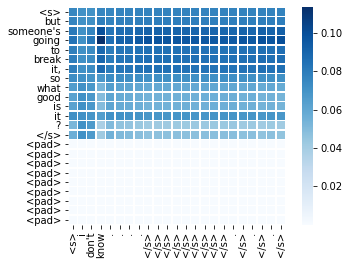

In [ ]:
visualize_attention(2777)

loss_test:  65.33435596084597
question:  no problem. i'll give him food off my plate.
gold answer:  oh, no you don't. puppies don't eat vegetables.
generated answer:  what do you mean ? ? . . . .


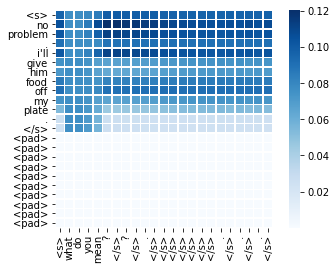

In [ ]:
visualize_attention(1000)

loss_test:  65.33435596084597
question:  i'm doing well. how about you?
gold answer:  never better, thanks.
generated answer:  i don't want to go .


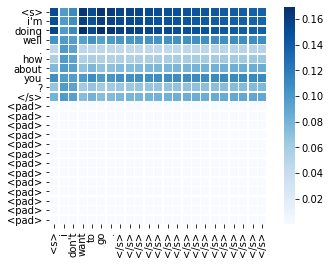

In [ ]:
visualize_attention(12)

loss_test:  65.33435596084597
question:  i like the one where the fireman tells us why we should vote yes.
gold answer:  don't believe him! whatever the tv ads tell you, the opposite is true.
generated answer:  i hope it . .


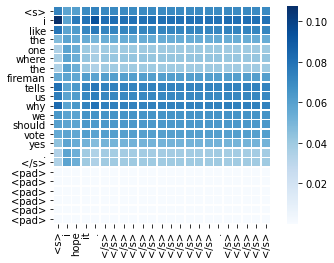

In [ ]:
visualize_attention(3500)

loss_test:  65.33435596084597
question:  i'll check to make sure that all the windows are shut.
gold answer:  it should be warmer in a few minutes.
generated answer:  i think that .


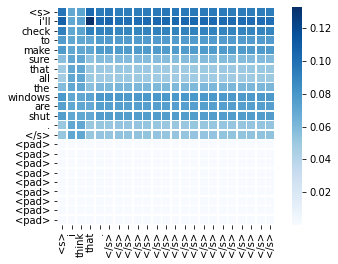

In [ ]:
visualize_attention(3333)